# Project Challenge: Predict Students’ Ability to Repay Educational Loans

## Introduction

Every year, millions of Americans join institutions of higher learning. They decide whether to go to college, which school to attend, and which education to pursue. There are thousands of colleges and students must choose the college that will help them achieve their personal life goals. Differences in college fees may lead to differences in the amount that students have to borrow, which may affect their career decisions and personal lives. The US Department of Education provides students, parents, families, and advisors with true college costs and value, that helps them make an informed college choice decision. The data also includes the earnings and outstanding debt of former college graduates.

This project aims to predict student loan repayment from institutional features. The dataset for this project can be found at [US Department of Education College Scorecard](https://collegescorecard.ed.gov/data/documentation/).

Also note that I used the latest data (2015_2016) for both training and testing. I chose this because in the latest data and it would be reliable enough to make an informed decision today.

----
## Exploring Data



In [25]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from time import time
from math import sqrt

# load the most recent cohorts dataset
data = pd.read_csv("MERGED2015_16_PP.csv")

root_columns = ['CITY', 'UNITID', 'OPEID', 'OPEID6', 'LATITUDE', 'LONGITUDE']
repayment_columns = ['RPY_1YR_RT', 'COMPL_RPY_1YR_RT', 'NONCOM_RPY_1YR_RT','LO_INC_RPY_1YR_RT', 
                     'MD_INC_RPY_1YR_RT', 'HI_INC_RPY_1YR_RT', 'DEP_RPY_1YR_RT', 'IND_RPY_1YR_RT', 
                     'PELL_RPY_1YR_RT', 'NOPELL_RPY_1YR_RT', 'FEMALE_RPY_1YR_RT', 'MALE_RPY_1YR_RT', 
                     'FIRSTGEN_RPY_1YR_RT', 'NOTFIRSTGEN_RPY_1YR_RT', 'RPY_3YR_RT', 'COMPL_RPY_3YR_RT', 
                     'NONCOM_RPY_3YR_RT', 'LO_INC_RPY_3YR_RT', 'MD_INC_RPY_3YR_RT', 'HI_INC_RPY_3YR_RT',
                     'DEP_RPY_3YR_RT', 'IND_RPY_3YR_RT', 'PELL_RPY_3YR_RT', 'NOPELL_RPY_3YR_RT',
                     'FEMALE_RPY_3YR_RT', 'MALE_RPY_3YR_RT', 'FIRSTGEN_RPY_3YR_RT', 'NOTFIRSTGEN_RPY_3YR_RT',
                     'RPY_5YR_RT', 'COMPL_RPY_5YR_RT', 'NONCOM_RPY_5YR_RT', 'LO_INC_RPY_5YR_RT', 
                     'MD_INC_RPY_5YR_RT', 'HI_INC_RPY_5YR_RT', 'DEP_RPY_5YR_RT', 'IND_RPY_5YR_RT', 
                     'PELL_RPY_5YR_RT', 'NOPELL_RPY_5YR_RT', 'FEMALE_RPY_5YR_RT', 'MALE_RPY_5YR_RT',
                     'FIRSTGEN_RPY_5YR_RT', 'NOTFIRSTGEN_RPY_5YR_RT', 'RPY_7YR_RT', 'COMPL_RPY_7YR_RT',
                     'NONCOM_RPY_7YR_RT', 'LO_INC_RPY_7YR_RT', 'MD_INC_RPY_7YR_RT', 'HI_INC_RPY_7YR_RT',
                     'DEP_RPY_7YR_RT', 'IND_RPY_7YR_RT', 'PELL_RPY_7YR_RT', 'NOPELL_RPY_7YR_RT', 
                     'FEMALE_RPY_7YR_RT', 'MALE_RPY_7YR_RT', 'FIRSTGEN_RPY_7YR_RT', 'NOTFIRSTGEN_RPY_7YR_RT',
                     'REPAY_DT_MDN', 'REPAY_DT_N', 'RPY_1YR_N', 'COMPL_RPY_1YR_N', 'NONCOM_RPY_1YR_N',
                     'LO_INC_RPY_1YR_N', 'MD_INC_RPY_1YR_N', 'HI_INC_RPY_1YR_N', 'DEP_RPY_1YR_N', 
                     'IND_RPY_1YR_N', 'PELL_RPY_1YR_N', 'NOPELL_RPY_1YR_N', 'FEMALE_RPY_1YR_N',
                     'MALE_RPY_1YR_N', 'FIRSTGEN_RPY_1YR_N', 'NOTFIRSTGEN_RPY_1YR_N', 'RPY_3YR_N',
                     'COMPL_RPY_3YR_N', 'NONCOM_RPY_3YR_N', 'LO_INC_RPY_3YR_N', 'MD_INC_RPY_3YR_N', 
                     'HI_INC_RPY_3YR_N', 'DEP_RPY_3YR_N', 'IND_RPY_3YR_N', 'PELL_RPY_3YR_N', 'NOPELL_RPY_3YR_N',
                     'FEMALE_RPY_3YR_N', 'MALE_RPY_3YR_N', 'FIRSTGEN_RPY_3YR_N', 'NOTFIRSTGEN_RPY_3YR_N',
                     'RPY_5YR_N', 'COMPL_RPY_5YR_N', 'NONCOM_RPY_5YR_N', 'LO_INC_RPY_5YR_N', 'MD_INC_RPY_5YR_N',
                     'HI_INC_RPY_5YR_N', 'DEP_RPY_5YR_N', 'IND_RPY_5YR_N', 'PELL_RPY_5YR_N', 'NOPELL_RPY_5YR_N',
                     'FEMALE_RPY_5YR_N', 'MALE_RPY_5YR_N', 'FIRSTGEN_RPY_5YR_N', 'NOTFIRSTGEN_RPY_5YR_N',
                     'RPY_7YR_N', 'COMPL_RPY_7YR_N', 'NONCOM_RPY_7YR_N', 'LO_INC_RPY_7YR_N', 'MD_INC_RPY_7YR_N',
                     'HI_INC_RPY_7YR_N', 'DEP_RPY_7YR_N', 'IND_RPY_7YR_N', 'PELL_RPY_7YR_N', 'NOPELL_RPY_7YR_N',
                     'FEMALE_RPY_7YR_N', 'MALE_RPY_7YR_N', 'FIRSTGEN_RPY_7YR_N', 'NOTFIRSTGEN_RPY_7YR_N',
                     'RPY_3YR_RT_SUPP', 'LO_INC_RPY_3YR_RT_SUPP', 'MD_INC_RPY_3YR_RT_SUPP', 'HI_INC_RPY_3YR_RT_SUPP',
                     'COMPL_RPY_3YR_RT_SUPP', 'NONCOM_RPY_3YR_RT_SUPP', 'DEP_RPY_3YR_RT_SUPP', 'IND_RPY_3YR_RT_SUPP',
                     'PELL_RPY_3YR_RT_SUPP', 'NOPELL_RPY_3YR_RT_SUPP', 'FEMALE_RPY_3YR_RT_SUPP', 'MALE_RPY_3YR_RT_SUPP', 
                     'FIRSTGEN_RPY_3YR_RT_SUPP', 'NOTFIRSTGEN_RPY_3YR_RT_SUPP', 'CDR2', 'CDR2_DENOM', 'CDR3_DENOM']

school_columns = ['INSTNM', 'STABBR', 'ZIP', 'INSTURL', 'NPCURL', 'ACCREDAGENCY', 'ALIAS', 'ACCREDCODE', 'T4APPROVALDATE']

completion_columns = ['SEPAR_DT_MDN']

#drop some school information columns
data_drop_school = data.drop(school_columns, axis = 1)

#drop root columns
#these columns include a school's ID and gps location
data_drop_root = data_drop_school.drop(root_columns, axis = 1)

#drop repayment columns
#These are the many disaggregated forms of the response variable repayment rate
#that need to be removed since only one response variable is needed
data_drop_repayment = data_drop_root.drop(repayment_columns, axis = 1)

#drop the median data student separated column in completion category
data_drop_completion = data_drop_repayment.drop(completion_columns, axis=1)

#drop columns with all NULL values
data_dropna_all = data_drop_completion.dropna(axis=1,how='all')

#drop columns with less than length_non_na_values_per_column  non-na values
length_non_na_values_per_column = int(len(data_dropna_all) * 0.7)
data_dropna_thresh = data_dropna_all.dropna(thresh=length_non_na_values_per_column, axis=1)

#replace string PrivacySuppressed and empty cells with nan
data_replace_string_PrivacySuppressed = data_dropna_thresh.replace([
    'PrivacySuppressed', r'\s+( +\.)|#', ''], [np.nan, np.nan, np.nan], regex=True)

#covert all object dtypes to float dtype as indicated in CollegeScoreCard Data Dictionary
data_convert_dtypes = data_replace_string_PrivacySuppressed.apply(lambda x: pd.to_numeric(x,errors='ignore'))

#impute NaN values
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
data_imputed = pd.DataFrame(imputer.fit_transform(data_convert_dtypes))
data_imputed.columns = data_convert_dtypes.columns
data_imputed.index = data_convert_dtypes.index

#use the 3 year cohort default rate as the target variable
y = data_imputed['CDR3']
X = data_imputed.drop('CDR3', axis = 1)

## Transforming Skewed Continous Features

In [27]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

X_normalized = pd.DataFrame(scaler.fit_transform(X))
X_normalized.columns = X.columns
X_normalized.index = X.index

# Show an example of a record with scaling applied
X_normalized.head(n = 5)

,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,CCBASIC,...,MD_FAMINC,FAMINC_IND,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,ICLEVEL,UGDS_MEN,UGDS_WOMEN,D_PCTPELL_PCTFLOAN,OPENADMP
0,0.0,1.0,0.0,0.75,1.0,0.0,0.0,0.555556,0.326087,0.583333,...,0.175945,0.129982,0.315409,0.680203,0.680203,0.0,0.4617,0.5383,0.027003,1.0
1,0.0,1.0,0.0,0.75,1.0,0.0,0.0,0.555556,0.326087,0.500000,...,0.276952,0.456307,0.307226,0.406091,0.406091,0.0,0.4116,0.5884,0.074921,1.0
2,0.0,1.0,0.0,0.75,1.0,0.5,0.0,0.555556,0.326087,0.666667,...,0.120130,0.287381,0.233158,0.436548,0.436548,0.0,0.4286,0.5714,0.001784,0.0
3,0.0,1.0,0.0,0.75,1.0,0.0,0.0,0.555556,0.326087,0.500000,...,0.321039,0.384026,0.324761,0.446701,0.446701,0.0,0.5740,0.4260,0.036036,1.0
4,0.0,1.0,0.0,0.75,1.0,0.0,0.0,0.555556,0.326087,0.583333,...,0.178203,0.102853,0.331167,0.621137,0.621137,0.0,0.3850,0.6150,0.030820,1.0


## Shuffle and Split Data

We split both features and the label into training and testing sets. 70% of the data will be used for training, and 30% for testing.

In [28]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'CDR3' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)
# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 5315 samples.
Testing set has 2278 samples.


## Training and Predicting

We craete a training and predicting function that evaluates the supplied learner on diffrent sample sizes. We evaluate both the training and testing time. We also evaluate the learner performance using the mean squared error (RMSE).

In [54]:
from sklearn.metrics import mean_squared_error

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: CDR3 training set
       - X_test: features testing set
       - y_test: CDR3 testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end-start
        
    # Get the predictions on the test set,
    # then get predictions on the training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
            
    # Compute rmse on training samples
    results['rmse_train'] = sqrt(mean_squared_error(y_train, predictions_train))
        
    # Compute rmse on test set
    results['rmse_test'] = sqrt(mean_squared_error(y_test, predictions_test))
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

## Model Evaluation

Here, we initialize and run three chosen supervised learning models. They are Linear Regression, Decision Trees and Random Forests.

In [55]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as pl

def evaluate(results):
    
    # Create figure
    fig, ax = pl.subplots(2, 2, figsize = (9,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'rmse_train', 'pred_time', 'rmse_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j/2, j%2].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j/2, j%2].set_xticks([0.45, 1.45, 2.45])
                ax[j/2, j%2].set_xticklabels(["1%", "10%", "100%"])
                ax[j/2, j%2].set_xlabel("Training Set Size")
                ax[j/2, j%2].set_xlim((-0.1, 3.0))
                
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("RMSE")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("RMSE")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("RMSE on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("RMSE on Testing Set")

    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 0.1))
    ax[1, 1].set_ylim((0, 2.5))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    pl.tight_layout()
    pl.show()


LinearRegression trained on 53 samples.
LinearRegression trained on 531 samples.
LinearRegression trained on 5315 samples.
RandomForestRegressor trained on 53 samples.
RandomForestRegressor trained on 531 samples.
RandomForestRegressor trained on 5315 samples.
DecisionTreeRegressor trained on 53 samples.
DecisionTreeRegressor trained on 531 samples.
DecisionTreeRegressor trained on 5315 samples.


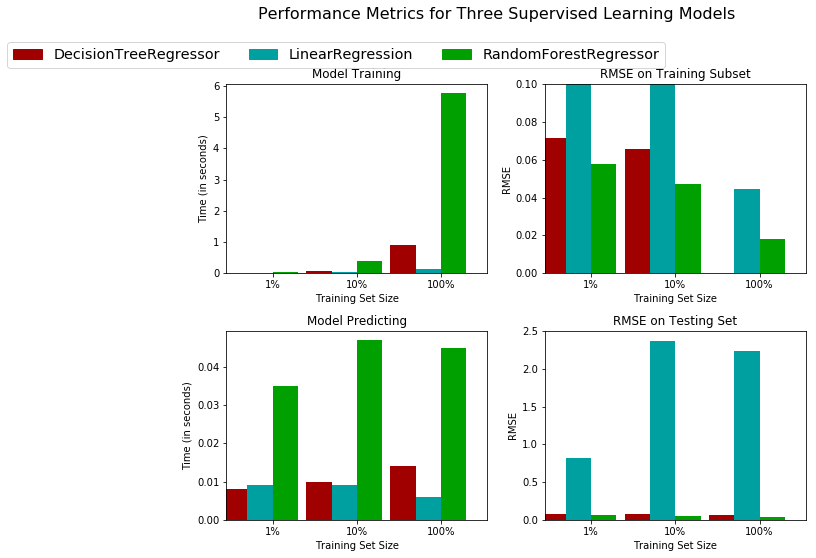

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#Initialize the three models
clf_A = LinearRegression()
clf_B = RandomForestRegressor(random_state=1)
clf_C = DecisionTreeRegressor(random_state=1)

#Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int(0.1 * samples_100)
samples_1 = int(0.01 * samples_100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

evaluate(results)

## Model Evaluation Discussion

I have chosen 3 supervised learning models, Linear Regression, Decision Trees for Regression, and Random Forests for Regression. I have then trained each model on different training sample sizes to see how each model handles every sample size. I also measured both training time and predicting time of each model. 

From the above analysis, the RMSE score on the training set is an interesting observation. Linear Regression is the best performer in terms of both training and testing time, but has the highest RMSE compared to the other models. The Decision Tree is a suitable predictor in this case. However, the training RMSE is significantly lower than the predicting RMSE. This shows that the DecisionTree is overfitting on the data. Although the Random Forest takes the longest time to both train and predict, it has a good RMSE. The training RMSE is higher than the predicing RMSE. Here, the Random Forest has avoided overfitting. 